## Imporitng Libraries

In [28]:
#importing EDA packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing SciKit learn packges 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

#importing stats models packages 

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ignoring warnings 
import warnings
warnings.filterwarnings('ignore')

from matplotlib import style # for plot styling
plt.style.use('ggplot')

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

## Analysing Data

In [29]:
#importing the given data set

bike=pd.read_csv('day.csv')

# observing the data set 

bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [30]:
#checking shape of the data set

bike.shape

(730, 16)

In [31]:
# checking for data types and missing values 
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [32]:
#checking data for numerical variables 

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Dropping Unwated Columns

In [33]:
#dropping unwated columns 

col=['casual','registered','instant','dteday']
bike.drop(col,inplace=True,axis=1)

In [34]:
#checking if the unwated columns are dropped. 

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Converting feature values to categorical variables. 

In [35]:
#converting month # to actual month
import calendar 
bike['mnth']=bike['mnth'].apply(lambda x: calendar.month_abbr[x])

In [36]:
bike.tail()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
725,1,1,Dec,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,Dec,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,Dec,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,Dec,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796
729,1,1,Dec,0,2,1,2,8.849153,11.17435,57.7500,10.374682,2729


In [37]:
#coverting season to categorical variable
bike['season']=bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [38]:
#coverting weathersit to categorical variables
bike['weathersit']=bike['weathersit'].map({1:'Good', 2:'Fair', 3:'Bad', 4:'Severe'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,1,1,Fair,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,2,1,Fair,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,3,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,4,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,5,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [39]:
#coverting weekday to categorical variables
bike['weekday']=bike['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike.tail()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
725,spring,1,Dec,0,Fri,1,Fair,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,Dec,0,Sat,0,Fair,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,Dec,0,Sun,0,Fair,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,Dec,0,Mon,1,Good,10.489153,11.58500,48.3333,23.500518,1796
729,spring,1,Dec,0,Tue,1,Fair,8.849153,11.17435,57.7500,10.374682,2729


In [40]:
bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Fair,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Fair,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Good,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Sat,0,Good,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Sun,0,Fair,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Mon,1,Fair,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Tue,1,Good,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Wed,1,Good,6.184153,7.54440,48.2917,14.958889,1321


## EDA for Numercial and Categorical Variables 


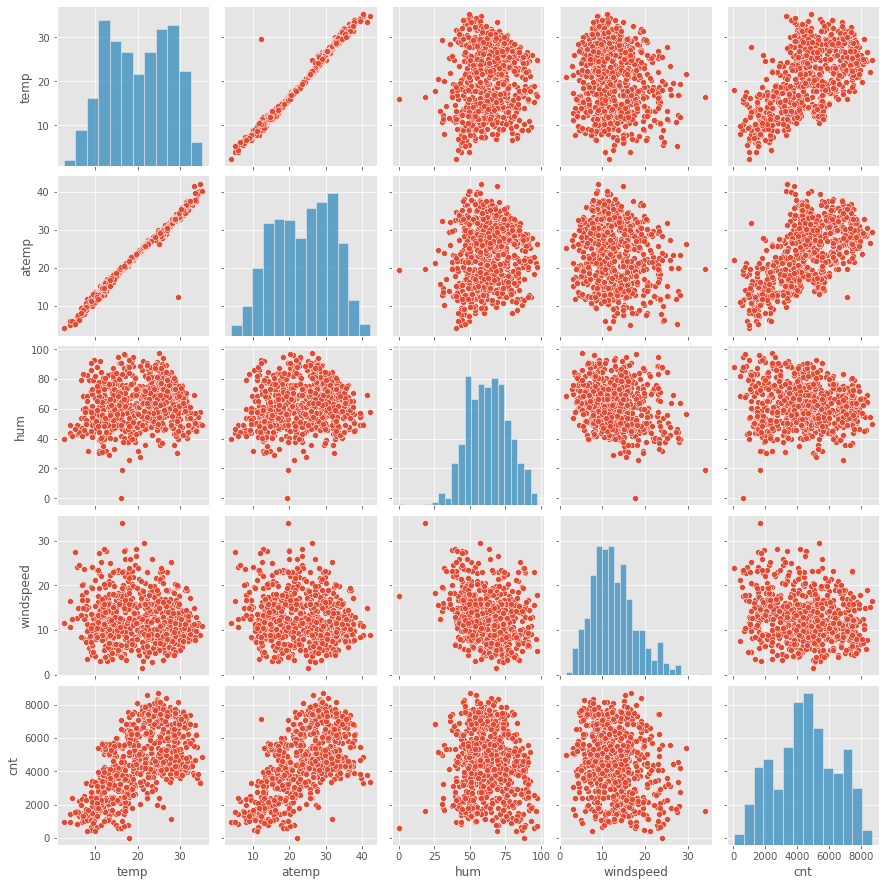

In [41]:
#using seaborn let us find the relationship between various numerical variables. This would be essential as we can drop the columns that are not needed for our model building.

sns.pairplot(data=bike,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

##### 'cnt' being the target variable, we see that the temp,atemp has a linear relationship with 'cnt'. 
##### casual and registered also have a linear relation with cnt but cnt is the sum of casual and registered. The 2 columns can be dropped along with a few other unwanted columns. 

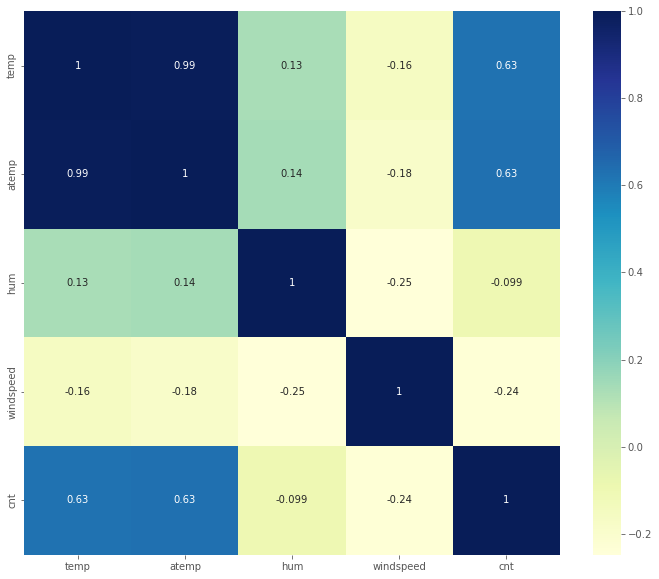

In [42]:
#heatmap to understand correltions 

plt.figure(figsize=(12,10))
col=bike[['temp','atemp','hum','windspeed','cnt']]
sns.heatmap(col.corr(),annot=True,cmap='YlGnBu')
plt.show()

##### temp and a temp has the highest and positive correlation with cnt. 
##### humidity and windspeed have negative correlation. 

In [43]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Fair,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Fair,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Good,9.305237,11.46350,43.6957,12.522300,1600


## EDA Categorical Variables

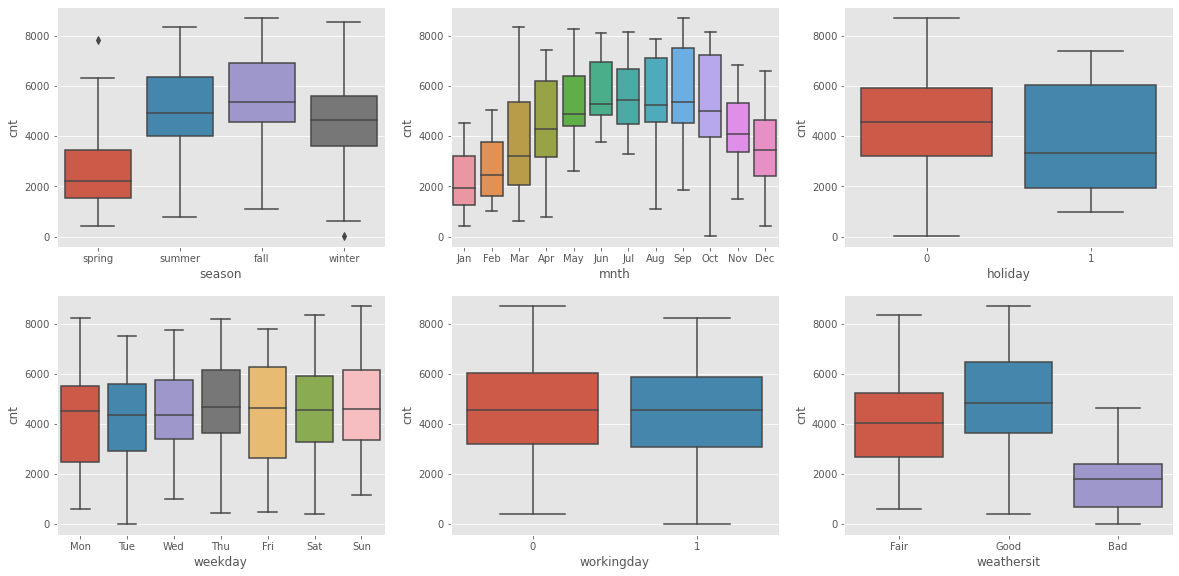

In [44]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(data=bike,y='cnt',x='season')
plt.subplot(3,3,2)
sns.boxplot(data=bike,y='cnt',x='mnth')
plt.subplot(3,3,3)
sns.boxplot(data=bike,y='cnt',x='holiday')
plt.subplot(3,3,4)
sns.boxplot(data=bike,y='cnt',x='weekday')
plt.subplot(3,3,5)
sns.boxplot(data=bike,y='cnt',x='workingday')
plt.subplot(3,3,6)
sns.boxplot(data=bike,y='cnt',x='weathersit')
plt.show()

##### 1. Rentals increase during summer and fall.
##### 2. Holidays and Non-Holidays do not have much of an influence on the # of rentals. 
##### 3. Demand stays same through the day of the week.
##### 4. Demand stays the same for working and non-working days.
##### 5. Demand for rentals drop significantly during bad weather days and tends to increase when the weather is good. 

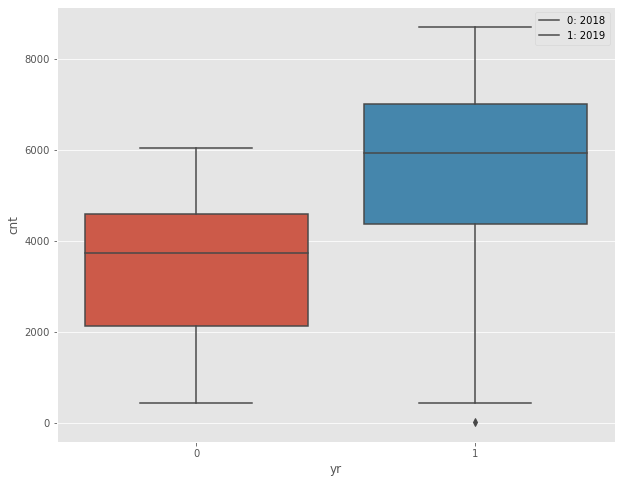

In [45]:
plt.figure(figsize=(10,8))
sns.boxplot(data=bike,y='cnt',x='yr')
labels=['0: 2018','1: 2019']
plt.legend(labels,loc='upper right')
plt.show()

##### The year 2019 sees an increase in demand for bike rentals compared to the previous year which is a positive sign. 

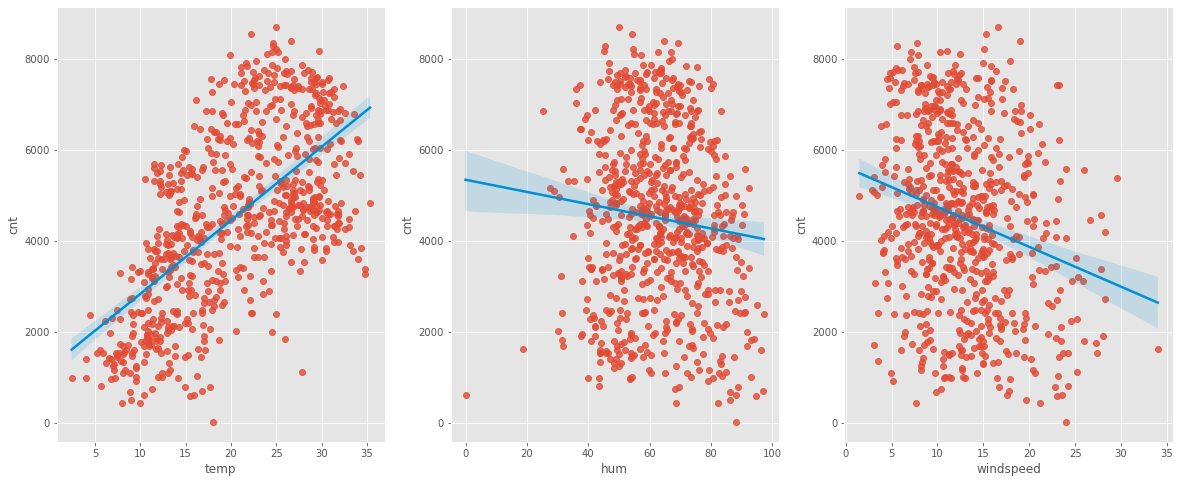

In [46]:
# pariplot showed that temp had a linear relationship with cnt. 
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.regplot(data=bike,y='cnt',x='temp',line_kws={'color':'#008FD5','linewidth':2.5})
plt.subplot(1,3,2)
sns.regplot(data=bike,y='cnt',x='hum',line_kws={'color':'#008FD5','linewidth':2.5})
plt.subplot(1,3,3)
sns.regplot(data=bike,y='cnt',x='windspeed',line_kws={'color':'#008FD5','linewidth':2.5})
plt.show()

##### 1. As temp increases, the # of rentals (cnt) also increases. Maybe rentals increase during summers. 
##### 2. Humidity and CNT are negatively correlated, an increased in humidty causes a decrease in rentals. 
##### 3. Same is the case for windspeed. As windspeed increases, the rentals drop understanbly as it is tough to ride a bike in high wind speed. 

## Creating Dummy variables for categorical variables

In [47]:
bike=pd.get_dummies(data=bike,columns=['season','weekday','mnth'],drop_first=True)
bike=pd.get_dummies(data=bike,columns=['weathersit']) # not using drop_true to avoid elimination of wanted data.
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Bad,weathersit_Fair,weathersit_Good
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Bad,weathersit_Fair,weathersit_Good
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
bike.shape

(730, 31)

### Scaling the numerical variables.

In [50]:
bike_train,bike_test=train_test_split(bike,test_size=0.3,random_state=300)

In [51]:
scaler=MinMaxScaler()
var=['temp','atemp','hum','windspeed','cnt']
bike_train[var]=scaler.fit_transform(bike_train[var])

## Splitting Data into Train and Test 

In [52]:
y_train=bike_train.pop('cnt')
X_train=bike_train

In [53]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Bad,weathersit_Fair,weathersit_Good
337,0,0,1,0.348693,0.361341,0.799484,0.146877,0,0,1,...,0,0,0,0,0,0,0,0,0,1
547,1,0,1,0.927277,0.833624,0.460712,0.412422,0,0,0,...,1,0,0,0,0,0,0,0,0,1
626,1,0,1,0.633172,0.617334,0.553027,0.459915,0,0,0,...,0,0,0,0,0,0,1,0,0,1
309,0,0,1,0.371152,0.379082,0.756977,0.166191,0,0,1,...,0,0,0,0,1,0,0,0,0,1
561,1,0,1,0.903748,0.863180,0.664663,0.338275,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [54]:
print(X_train.shape)


(511, 30)


## Scaling of Continous Variables

In [55]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Bad,weathersit_Fair,weathersit_Good
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.489237,0.027397,0.694716,0.557587,0.525994,0.642490,0.410929,0.244618,0.244618,0.246575,...,0.082192,0.074364,0.080235,0.084149,0.082192,0.084149,0.088063,0.031311,0.322896,0.645793
std,0.500374,0.163398,0.460979,0.238481,0.222090,0.146960,0.189323,0.430282,0.430282,0.431440,...,0.274926,0.262619,0.271923,0.277883,0.274926,0.277883,0.283664,0.174328,0.468042,0.478741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355111,0.336811,0.526621,0.268535,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.559379,0.540441,0.641047,0.386258,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.766321,0.710274,0.744311,0.513330,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### As we can here, all continous variables have been scaled with some sort of standardisation. 

## Model Building using RFE

In [56]:
lm=LinearRegression()
lm.fit(X_train, y_train) # fitting the variables.

rfe=RFE(lm,13)
rfe=rfe.fit(X_train, y_train)

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) #creating a list

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 17),
 ('season_winter', False, 3),
 ('weekday_Mon', False, 14),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 18),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 15),
 ('mnth_Aug', False, 16),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 9),
 ('mnth_Jan', False, 7),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 11),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weathersit_Bad', True, 1),
 ('weathersit_Fair', False, 8),
 ('weathersit_Good', False, 2)]

In [58]:
support=X_train.columns[rfe.support_] # These are the columns that are supported by Recursive Feature Elmination (RFE)
support

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'weekday_Sat', 'weekday_Sun', 'mnth_Jul', 'mnth_Sep',
       'weathersit_Bad'],
      dtype='object')

In [59]:
X_train.columns[~rfe.support_] # These are the columns that are not supported by Recursive Feature Elmination (RFE). The columns need not be considered for our model building.

Index(['season_summer', 'season_winter', 'weekday_Mon', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weathersit_Fair', 'weathersit_Good'],
      dtype='object')

In [60]:
# Let us create a df with only the 13 columns that are needed. This
X_train_1=X_train[support]

## Building model using statsmodel

#### Defining functions for model and VIF to enable repititive use.

In [61]:
def model(val):
    X_train_rfe=sm.add_constant(val)
    lm=sm.OLS(y_train,X_train_rfe)
    lm_model=lm.fit()
    return lm_model.summary()

In [62]:
def vif(val):
    
    vif=pd.DataFrame()
    X_train_rfe=val
    vif['Column Name']=X_train_rfe.columns 
    vif['VIF Value']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
    vif['VIF Value']=round(vif['VIF Value'],2)
    vif=vif.sort_values(by='VIF Value',ascending=False)
    return vif

### Model 1

In [63]:
model(X_train_1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     194.0
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          4.19e-185
Time:                        09:37:45   Log-Likelihood:                 503.92
No. Observations:                 511   AIC:                            -979.8
Df Residuals:                     497   BIC:                            -920.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6858      0.102      6.741      0.000       0.486       0.886
yr                 0.2287      0.008     27.977      0.000       0.213       0.245
holiday           -0.2678      0.092     -2.897      0.004      -0.449      -0.086
workingday        -0.2291      0.096     -2.383      0.018      -0.418      -0.040
temp               0.1963      0.124      1.590      0.113      -0.046       0.439
atemp              0.2002      0.133      1.501      0.134      -0.062       0.462
hum               -0.2461      0.031     -7.994      0.000      -0.307      -0.186
windspeed         -0.1723      0.023     -7.472      0.000      -0.218      -0.127
season_spring     -0.1688      0.012    -13.580      0.000      -0.193      -0.144
weekday_Sat       -0.2075      0.095     -2.174      0.030      -0.395      -0.020
weekday_Sun       -0.2098      0.097     -2.170      0.030      -0.400      -0.020
mnth_Jul          -0.0663      0.017     -3.914      0.000      -0.100      -0.033
mnth_Sep           0.0738      0.015      4.900      0.000       0.044       0.103
weathersit_Bad    -0.1712      0.025     -6.885      0.000      -0.220      -0.122
==============================================================================
Omnibus:                       35.366   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.141
Skew:                          -0.560   Prob(JB):                     5.80e-11
Kurtosis:                       3.980   Cond. No.                         92.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
vif(X_train_1)

,Column Name,VIF Value
4,atemp,353.62
3,temp,341.91
2,workingday,29.86
5,hum,23.71
8,weekday_Sat,6.67
6,windspeed,6.50
9,weekday_Sun,6.39
7,season_spring,2.24
1,holiday,2.06
0,yr,1.98


#### Dropping 'atemp' due to high VIF and p value.

In [65]:
X_train_2=X_train_1.drop(['atemp'],axis=1)

In [66]:
model(X_train_2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.4
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          8.69e-186
Time:                        09:37:45   Log-Likelihood:                 502.76
No. Observations:                 511   AIC:                            -979.5
Df Residuals:                     498   BIC:                            -924.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6868      0.102      6.742      0.000       0.487       0.887
yr                 0.2287      0.008     27.937      0.000       0.213       0.245
holiday           -0.2658      0.093     -2.872      0.004      -0.448      -0.084
workingday        -0.2260      0.096     -2.348      0.019      -0.415      -0.037
temp               0.3780      0.025     15.282      0.000       0.329       0.427
hum               -0.2418      0.031     -7.879      0.000      -0.302      -0.182
windspeed         -0.1775      0.023     -7.775      0.000      -0.222      -0.133
season_spring     -0.1704      0.012    -13.745      0.000      -0.195      -0.146
weekday_Sat       -0.2057      0.096     -2.154      0.032      -0.393      -0.018
weekday_Sun       -0.2066      0.097     -2.135      0.033      -0.397      -0.016
mnth_Jul          -0.0660      0.017     -3.889      0.000      -0.099      -0.033
mnth_Sep           0.0731      0.015      4.851      0.000       0.043       0.103
weathersit_Bad    -0.1721      0.025     -6.914      0.000      -0.221      -0.123
==============================================================================
Omnibus:                       33.333   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.728
Skew:                          -0.541   Prob(JB):                     3.20e-10
Kurtosis:                       3.939   Cond. No.                         87.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
vif(X_train_2)

,Column Name,VIF Value
2,workingday,29.56
4,hum,23.49
3,temp,13.24
7,weekday_Sat,6.64
5,windspeed,6.35
8,weekday_Sun,6.33
6,season_spring,2.22
1,holiday,2.05
0,yr,1.98
9,mnth_Jul,1.44


#### Dropping 'workingday' due to high VIF value (>5).

In [68]:
X_train_3=X_train_2.drop(['workingday'],axis=1)

In [69]:
model(X_train_3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.9
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          8.67e-186
Time:                        09:37:45   Log-Likelihood:                 499.95
No. Observations:                 511   AIC:                            -975.9
Df Residuals:                     499   BIC:                            -925.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4568      0.028     16.242      0.000       0.402       0.512
yr                 0.2295      0.008     27.926      0.000       0.213       0.246
holiday           -0.0565      0.025     -2.252      0.025      -0.106      -0.007
temp               0.3815      0.025     15.379      0.000       0.333       0.430
hum               -0.2395      0.031     -7.773      0.000      -0.300      -0.179
windspeed         -0.1766      0.023     -7.704      0.000      -0.222      -0.132
season_spring     -0.1685      0.012    -13.559      0.000      -0.193      -0.144
weekday_Sat        0.0169      0.012      1.443      0.150      -0.006       0.040
weekday_Sun        0.0188      0.012      1.530      0.127      -0.005       0.043
mnth_Jul          -0.0662      0.017     -3.885      0.000      -0.100      -0.033
mnth_Sep           0.0736      0.015      4.865      0.000       0.044       0.103
weathersit_Bad    -0.1724      0.025     -6.894      0.000      -0.222      -0.123
==============================================================================
Omnibus:                       32.729   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.206
Skew:                          -0.541   Prob(JB):                     6.84e-10
Kurtosis:                       3.901   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
vif(X_train_3)

,Column Name,VIF Value
2,temp,10.84
3,hum,10.83
4,windspeed,5.03
5,season_spring,1.94
0,yr,1.93
8,mnth_Jul,1.43
9,mnth_Sep,1.21
6,weekday_Sat,1.20
7,weekday_Sun,1.20
10,weathersit_Bad,1.14


#### Dropping 'weekday_Sat' due to high p value.

In [71]:
X_train_4=X_train_3.drop(['weekday_Sat'],axis=1)

In [72]:
model(X_train_4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.8
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          1.51e-186
Time:                        09:37:46   Log-Likelihood:                 498.88
No. Observations:                 511   AIC:                            -975.8
Df Residuals:                     500   BIC:                            -929.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4617      0.028     16.525      0.000       0.407       0.517
yr                 0.2293      0.008     27.880      0.000       0.213       0.245
holiday           -0.0581      0.025     -2.315      0.021      -0.107      -0.009
temp               0.3823      0.025     15.401      0.000       0.334       0.431
hum               -0.2432      0.031     -7.914      0.000      -0.304      -0.183
windspeed         -0.1762      0.023     -7.678      0.000      -0.221      -0.131
season_spring     -0.1689      0.012    -13.582      0.000      -0.193      -0.145
weekday_Sun        0.0158      0.012      1.301      0.194      -0.008       0.040
mnth_Jul          -0.0671      0.017     -3.935      0.000      -0.101      -0.034
mnth_Sep           0.0735      0.015      4.851      0.000       0.044       0.103
weathersit_Bad    -0.1724      0.025     -6.889      0.000      -0.222      -0.123
==============================================================================
Omnibus:                       31.130   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.387
Skew:                          -0.529   Prob(JB):                     2.80e-09
Kurtosis:                       3.855   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
vif(X_train_4)

,Column Name,VIF Value
3,hum,10.83
2,temp,10.75
4,windspeed,4.99
5,season_spring,1.94
0,yr,1.93
7,mnth_Jul,1.43
8,mnth_Sep,1.21
6,weekday_Sun,1.17
9,weathersit_Bad,1.14
1,holiday,1.04


#### Dropping 'weekday_Sun' due to high p value.

In [74]:
X_train_5=X_train_4.drop(['weekday_Sun'],axis=1)

In [75]:
model(X_train_5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     274.7
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          2.06e-187
Time:                        09:37:46   Log-Likelihood:                 498.02
No. Observations:                 511   AIC:                            -976.0
Df Residuals:                     501   BIC:                            -933.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4648      0.028     16.679      0.000       0.410       0.519
yr                 0.2296      0.008     27.916      0.000       0.213       0.246
holiday           -0.0603      0.025     -2.404      0.017      -0.110      -0.011
temp               0.3819      0.025     15.374      0.000       0.333       0.431
hum               -0.2448      0.031     -7.965      0.000      -0.305      -0.184
windspeed         -0.1754      0.023     -7.641      0.000      -0.221      -0.130
season_spring     -0.1689      0.012    -13.571      0.000      -0.193      -0.144
mnth_Jul          -0.0684      0.017     -4.016      0.000      -0.102      -0.035
mnth_Sep           0.0741      0.015      4.886      0.000       0.044       0.104
weathersit_Bad    -0.1745      0.025     -6.982      0.000      -0.224      -0.125
==============================================================================
Omnibus:                       28.004   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.210
Skew:                          -0.491   Prob(JB):                     2.26e-08
Kurtosis:                       3.831   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
vif(X_train_5)

,Column Name,VIF Value
3,hum,10.81
2,temp,10.74
4,windspeed,4.96
0,yr,1.93
5,season_spring,1.93
6,mnth_Jul,1.42
7,mnth_Sep,1.21
8,weathersit_Bad,1.14
1,holiday,1.03


#### Dropping 'hum' due to high VIF.

In [77]:
X_train_6=X_train_5.drop(['hum'],axis=1)

In [78]:
model(X_train_6)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     267.8
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          1.04e-175
Time:                        09:37:46   Log-Likelihood:                 467.55
No. Observations:                 511   AIC:                            -917.1
Df Residuals:                     502   BIC:                            -879.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2985      0.020     15.252      0.000       0.260       0.337
yr                 0.2354      0.009     27.090      0.000       0.218       0.252
holiday           -0.0694      0.027     -2.613      0.009      -0.122      -0.017
temp               0.3641      0.026     13.878      0.000       0.313       0.416
windspeed         -0.1337      0.024     -5.642      0.000      -0.180      -0.087
season_spring     -0.1642      0.013    -12.457      0.000      -0.190      -0.138
mnth_Jul          -0.0550      0.018     -3.060      0.002      -0.090      -0.020
mnth_Sep           0.0618      0.016      3.867      0.000       0.030       0.093
weathersit_Bad    -0.2353      0.025     -9.324      0.000      -0.285      -0.186
==============================================================================
Omnibus:                       35.388   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.293
Skew:                          -0.590   Prob(JB):                     2.41e-10
Kurtosis:                       3.830   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
vif(X_train_6)

,Column Name,VIF Value
2,temp,4.85
3,windspeed,4.70
0,yr,1.92
4,season_spring,1.63
5,mnth_Jul,1.34
6,mnth_Sep,1.20
7,weathersit_Bad,1.06
1,holiday,1.03


#### All variables here have permissible VIF and P value. Hence we select this our final model.

### FINAL MODEL

In [80]:
X_train_lm=sm.add_constant(X_train_6)
lm=sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     267.8
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          1.04e-175
Time:                        09:37:46   Log-Likelihood:                 467.55
No. Observations:                 511   AIC:                            -917.1
Df Residuals:                     502   BIC:                            -879.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2985      0.020     15.

In [81]:
print(lm.params)

const             0.298475
yr                0.235392
holiday          -0.069383
temp              0.364054
windspeed        -0.133716
season_spring    -0.164233
mnth_Jul         -0.054968
mnth_Sep          0.061831
weathersit_Bad   -0.235340
dtype: float64


In [82]:
vif(X_train_6)

,Column Name,VIF Value
2,temp,4.85
3,windspeed,4.70
0,yr,1.92
4,season_spring,1.63
5,mnth_Jul,1.34
6,mnth_Sep,1.20
7,weathersit_Bad,1.06
1,holiday,1.03


### Residual Analysis of Training Data

In [83]:
y_train_pred=lm.predict(X_train_lm)

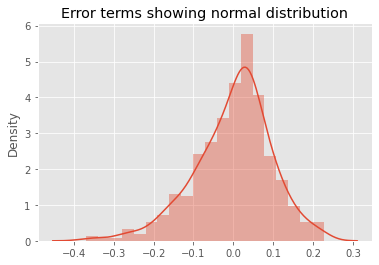

In [84]:
sns.distplot((y_train-y_train_pred),bins=20)
plt.title('Error terms showing normal distribution')
plt.show()

#### The error terms are normally distributed as seen in the above fig.

### Predictions using Test Data

In [85]:
var=['temp','atemp','hum','windspeed','cnt']
bike_test[var]=scaler.transform(bike_test[var])

In [86]:
y_test=bike_test.pop('cnt')
X_test=bike_test

In [87]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Bad,weathersit_Fair,weathersit_Good
146,0,0,0,0.798941,0.746604,0.673679,0.520759,0,1,0,...,0,0,0,1,0,0,0,0,0,1
263,0,0,1,0.687715,0.630888,0.927436,0.176569,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.455641,0.447507,0.640189,0.330861,1,0,0,...,0,0,1,0,0,0,0,0,1,0
552,1,0,0,1.029946,0.971286,0.507084,0.336765,0,0,0,...,1,0,0,0,0,0,0,0,0,1
302,0,0,1,0.333721,0.324179,0.642765,0.367929,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [88]:
X_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Bad,weathersit_Fair,weathersit_Good
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.525114,0.031963,0.680365,0.566092,0.536613,0.656808,0.378012,0.251142,0.269406,0.237443,...,0.091324,0.100457,0.095890,0.086758,0.082192,0.086758,0.068493,0.022831,0.369863,0.607306
std,0.500513,0.176306,0.467403,0.226998,0.208893,0.145989,0.172753,0.434663,0.444668,0.426491,...,0.288730,0.301297,0.295115,0.282125,0.275286,0.282125,0.253169,0.149707,0.483873,0.489468
min,0.000000,0.000000,0.000000,0.047987,0.026455,0.193646,0.057872,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.361527,0.349520,0.554315,0.266299,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.592532,0.573409,0.661228,0.357540,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.762578,0.707754,0.758909,0.484403,0.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.029946,1.019437,1.002146,1.157215,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
X_test=X_test[X_train_6.columns]

In [90]:
X_test.head()

,yr,holiday,temp,windspeed,season_spring,mnth_Jul,mnth_Sep,weathersit_Bad
146,0,0,0.798941,0.520759,0,0,0,0
263,0,0,0.687715,0.176569,0,0,1,0
426,1,0,0.455641,0.330861,1,0,0,0
552,1,0,1.029946,0.336765,0,1,0,0
302,0,0,0.333721,0.367929,0,0,0,0


In [91]:
X_test=sm.add_constant(X_test)
y_pred=lm.predict(X_test)

### Model Evalutation

### r2 score 

In [92]:
round(r2_score(y_test,y_pred),2)

0.76

In [93]:
mean_squared_error(y_test,y_pred)

0.01195955851027706

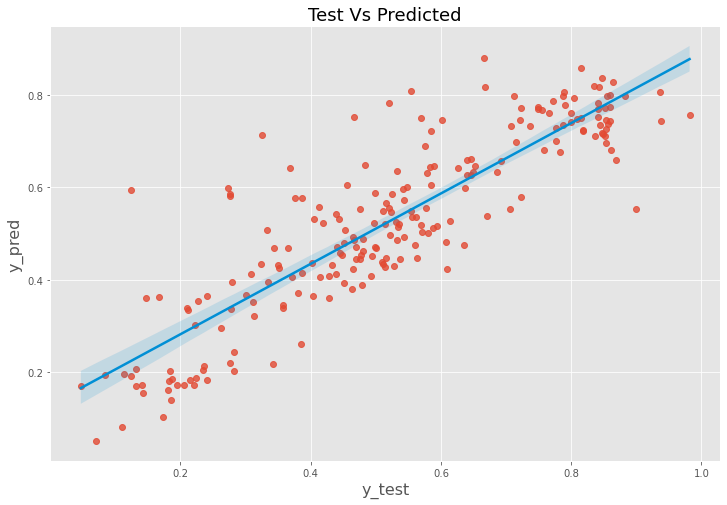

In [94]:
plt.figure(figsize=(12,8))
plt.title('Test Vs Predicted',fontsize=18)
sns.regplot(x=y_test,y=y_pred,line_kws={'color':'#008FD5','linewidth':2.5})
plt.xlabel('y_test',fontsize=16)
plt.ylabel('y_pred',fontsize=16)
plt.show()

### Our test seems to be linear with pred. 

In [95]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,9))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
3,temp,0.364054
0,const,0.298475
1,yr,0.235392
7,mnth_Sep,0.061831
6,mnth_Jul,-0.054968
2,holiday,-0.069383
4,windspeed,-0.133716
5,season_spring,-0.164233
8,weathersit_Bad,-0.235340


## Final Equation 

cnt=0.2984+(0.2353)*yr-(0.0693)*holiday+(0.3749)*temp-(0.1547)*windspeed-(0.1642)*spring-(0.0549)*mnth_Jul+(0.061)*mnth_Sep-(0.235)*weathersit_Bad
